In [1]:
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.optim import AdamW, lr_scheduler

from core.audio_handler import load_dataset
from core.audio_model import AudioModel
from core.dataset_handler import DatasetHandler

In [2]:
num_epochs = 50
dataset_length = 1000

In [3]:
dataset_handler = DatasetHandler(use_mps=True)
dataset = load_dataset("dataset.pt")
train_loader, val_loader = dataset_handler.split_dataset_into_data_loaders(dataset, dataset_length)

print('Finished data preparation')

Finished data preparation


In [4]:
model = AudioModel(use_mps=True)
model.init_weights()

criterion = nn.MSELoss()
optimizer = AdamW(model.parameters(), lr=0.001, weight_decay=1e-2)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10)

print('Model initialized')

Model initialized


In [5]:
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    val_loss = val_loss / len(val_loader)
    val_losses.append(val_loss)

    scheduler.step(val_loss)

    print(f"Epoch {epoch + 1}, Training Loss: {train_loss:.0f}, Validation Loss: {val_loss:.0f}")

print('Finished Training')

Epoch 1, Training Loss: 731, Validation Loss: 380
Epoch 2, Training Loss: 724, Validation Loss: 380
Epoch 3, Training Loss: 721, Validation Loss: 380
Epoch 4, Training Loss: 719, Validation Loss: 379
Epoch 5, Training Loss: 716, Validation Loss: 376
Epoch 6, Training Loss: 715, Validation Loss: 377
Epoch 7, Training Loss: 715, Validation Loss: 374
Epoch 8, Training Loss: 713, Validation Loss: 375
Epoch 9, Training Loss: 710, Validation Loss: 373
Epoch 10, Training Loss: 711, Validation Loss: 375
Epoch 11, Training Loss: 708, Validation Loss: 375
Epoch 12, Training Loss: 708, Validation Loss: 369
Epoch 13, Training Loss: 707, Validation Loss: 369
Epoch 14, Training Loss: 706, Validation Loss: 369
Epoch 15, Training Loss: 703, Validation Loss: 368
Epoch 16, Training Loss: 701, Validation Loss: 369
Epoch 17, Training Loss: 700, Validation Loss: 368
Epoch 18, Training Loss: 699, Validation Loss: 367
Epoch 19, Training Loss: 699, Validation Loss: 366
Epoch 20, Training Loss: 698, Validation

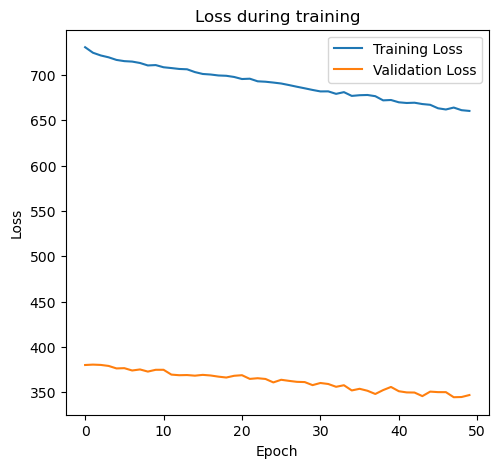

In [6]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss during training')
plt.legend()

plt.show()

In [7]:
model.save()
print('Model saved')

Model saved
